<a href="https://colab.research.google.com/github/yarkalm/salary_analysis/blob/main/Salary_analysis_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**ML School by REU Data Scinece Club**</center>

---
## <center> Неделя №3 </center>




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Теперь давайте скачаем нужные данные


In [ ]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

Cloning into 'REU-Ml-SCHOOL'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 1.12 MiB | 2.49 MiB/s, done.


In [ ]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
16123,4/28/2021 17:32:39,35-44,Computing or Tech,Development programmer,NaN,"37,850",500.0,GBP,NaN,NaN,UK,NaN,Nottingham,11 - 20 years,11 - 20 years,College degree,Man,White
7185,4/27/2021 14:32:07,35-44,Libraries,Head of Public Services,"Despite the title, I'm just the supervisor of ...","62,000",930.0,USD,NaN,NaN,United States,Michigan,Lansing,11 - 20 years,8 - 10 years,Master's degree,Man,White
6514,4/27/2021 13:54:04,35-44,Retail,pricing clerk,NaN,"39,000",0.0,USD,NaN,NaN,USA,Florida,melbourne,11 - 20 years,11 - 20 years,High School,Woman,White
1717,4/27/2021 11:30:40,35-44,Computing or Tech,Team Lead / Relationship Manager,NaN,"86,000",1500.0,USD,NaN,NaN,United States,Idaho,Boise,11 - 20 years,11 - 20 years,Master's degree,NaN,Another option not listed here or prefer not t...
2951,4/27/2021 11:55:30,35-44,Government and Public Administration,Regulatory review biologist,NaN,"88,649",NaN,CAD,NaN,NaN,Canada,NaN,"Regina, SK",11 - 20 years,11 - 20 years,College degree,Woman,White


Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [ ]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary', 
              'Amount of monetary compensation', 'Currency', 
              'Currency special', 'Income context', 'Country', 
              'State in USA', 'City', 'Work experience all', 
              'Work expirince in current field', 'Education', 'Gender', 'Race' 
              ]
df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
1384,4/27/2021 11:24:47,45-54,Education (Higher Education),Supervisor of Student Activities,NaN,"62,672",NaN,USD,NaN,Although benefits were not asked about in this...,United States,Michigan,Ann Arbor,11 - 20 years,11 - 20 years,Master's degree,Woman,White
24485,5/5/2021 15:50:43,25-34,Health care,Research Coordinator,NaN,70000,NaN,CAD,NaN,NaN,Canda,NaN,Toronto,1 year or less,2 - 4 years,Master's degree,Woman,Asian or Asian American
16788,4/28/2021 18:32:26,25-34,Computing or Tech,Sr. Communications and Outreach Strategist,NaN,"103,000",1000.0,USD,NaN,NaN,United States,Maryland,"McLean, VA",8 - 10 years,5-7 years,College degree,Woman,"Black or African American, Hispanic, Latino, o..."
15454,4/28/2021 17:07:35,45-54,Media & Digital,Senior Online Editor,I'm a copy editor and proofreader for a nonpro...,"65,000",500.0,USD,NaN,NaN,USA,Massachusetts,Boston,21 - 30 years,21 - 30 years,College degree,Man,White
11251,4/27/2021 23:58:08,35-44,Computing or Tech,Product Marketing Lead,NaN,"130,000",10000.0,USD,NaN,NaN,United States,Minnesota,Minneapolis,11 - 20 years,11 - 20 years,Master's degree,Woman,White


# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару. 
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете. 
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html).

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
!pip install forex-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 3.4 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
from forex_python.converter import CurrencyRates
from sklearn.utils import shuffle

In [ ]:
df.head(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [ ]:
new_df = df[['Timestamp','Salary','Amount of monetary compensation','Currency']]

In [ ]:
for i in range(len(df)):
  new_df.loc[i, 'Salary'] = int(new_df.loc[i, 'Salary'].replace(',',''))

In [ ]:
import requests
import urllib3

def get_rate(base_cur, dest_cur, date_obj):
    urllib3.disable_warnings()
    date_str = date_obj.strftime('%Y-%m-%d')
    payload = {'base': base_cur, 'rtype': 'fpy'}
    source_url = "https://theforexapi.com/api/" + date_str
    response = requests.get(source_url, params=payload, verify=False)
    if response.status_code == 200:
        rates = response.json().get('rates').get(dest_cur)
        return rates

In [ ]:
for i in range(len(new_df)):
  currency = new_df.loc[i, 'Currency'] 
  if currency != 'USD' and currency != 'Other' and currency != 'AUD/NZD':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    course = get_rate('USD', currency, dt)
    new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
    new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
    new_df.loc[i, 'Currency'] = 'USD'
  elif currency == 'AUD/NZD':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    course = get_rate('USD', 'AUD', dt)
    new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
    new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
    new_df.loc[i, 'Currency'] = 'USD'
  elif currency == 'Other':
    date, time = new_df.iloc[0]['Timestamp'].split(' ')
    date = list(map(int,date.split('/')))
    time = list(map(int,time.split(':')))
    dt = datetime(date[2],date[0],date[1],time[0],time[1],time[2])
    try:
      course = get_rate('USD', new_df.loc[i, 'Currency special'], dt)
      new_df.loc[i, 'Salary'] = new_df.loc[i, 'Salary'] * course
      new_df.loc[i, 'Amount of monetary compensation'] = new_df.loc[i, 'Amount of monetary compensation'] * course
      new_df.loc[i, 'Currency'] = 'USD'
    except KeyError:
      new_df = new_df.drop(index = i)
      continue

После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [ ]:
df['Salary'] = new_df['Salary']
df['Currency'] = new_df['Currency']
df['Amount of monetary compensation'] = new_df['Amount of monetary compensation']

In [ ]:
df = df.drop(columns=['Currency', 'Currency special'],axis = 1)

KeyError: ignored

In [ ]:
df.head(100)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,USD
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000,NaN,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,USD
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,USD
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",USD


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [ ]:
usa_names = ['United States', 'US', 'USA', 
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ', 
       'United states ','united states', 'United States of America ', 
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A', 
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States', 
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas', 
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas', 
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)', 
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America', 
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ', 
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America', 
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',   
           'United Kingdom', 'UK ', 'England/UK',   
           'UK', 'Great Britain ', 'Englang',     
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',      
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',         
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',     
           'United Kingdom.', 'Northern Ireland ', 'england',   
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',     
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',   
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ', 
           'Wales, UK', 'England, UK',  'Uk ',  'uk', 
           'Northern Ireland, United Kingdom', 'uk',   
           'UK, but for globally fully remote company','England, United Kingdom ','Unites kingdom ']

canada_names = ['Canada','canada', 'Canada', 'Canada, Ottawa, ontario', 'CANADA ', 
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ','Germany', 'germany', 'Company in Germany. I work from Pakistan.']

При помощи следующей ячейки были выявлены вручную около 6 значений, относящиеся к спискам USA, UK, Canada, German.

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
country_names = df['Country'].unique()
other_countries = [x for x in country_names if x not in [*usa_names,*uk_names,*canada_names,*ger_names] and (len(x)>3 and len(x)<53)]
other_countries.remove('$2,175.84/year is deducted for benefits')
other_countries = sorted(other_countries)
print(*other_countries)

In [ ]:
from fuzzywuzzy import process
from fuzzywuzzy.fuzz import ratio

In [ ]:
set_countries = 'Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Channel Islands,Chile,China,Colombia,Comoros,Congo,Costa Rica,Côte dIvoire,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,DR Congo,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faeroe Islands,Finland,France,French Guiana,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Réunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome & Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,The Bahamas,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe'
set_countries =  set(set_countries.split(','))

In [ ]:
for i in range(len(other_countries)):
  if other_countries[i] in set_countries:
    continue
  else:
    a = process.extractOne(other_countries[i], set_countries,scorer=ratio)
    if a[1]>75:
      #print(other_countries[i], ' - ', a[0])
      other_countries[i] = a[0]
other_countries = sorted(list(set(other_countries)))

In [ ]:
for i in range(len(df)):
  country = df.loc[i, 'Country'] 
  if country in usa_names:
    df.loc[i, 'Country'] = 'USA'
  elif country in uk_names:
    df.loc[i, 'Country'] = 'UK'
  elif country in canada_names:
    df.loc[i, 'Country'] = 'Canada'
  elif country in ger_names:
    df.loc[i, 'Country'] = 'Germany'
  elif country in other_countries:
    continue  
  else:
    a = process.extractOne(country, set_countries,scorer=ratio)
    if a[1]>70:
      df.loc[i, 'Country'] = a[0]
    else:
      df.drop(i, axis = 0)
df.head(100)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,USD
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000,NaN,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,USD
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,USD
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",USD


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [ ]:
df.isnull().sum().sum()

Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [ ]:
df.isnull().sum()

In [ ]:
df = df.fillna({'Amount of monetary compensation':0,
                'State in USA': 'Another Country',
                'City': 'Another Country',
                'Salary': df['Salary'].mode()[0]})

In [ ]:
df.head(50)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,USD
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,USD
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,USD
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",USD


## Этап 2.2
Давайте теперь попробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent). 
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
edu = df[['Education']].values

In [ ]:
edu

array([["Master's degree"],
       ['College degree'],
       ['College degree'],
       ...,
       [nan],
       ["Master's degree"],
       ['College degree']], dtype=object)

In [ ]:
s_i = SimpleImputer(missing_values  = np.nan, strategy='most_frequent')

In [ ]:
df['Education'] = s_i.fit_transform(edu)

In [ ]:
df.head(30)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000.000000,0.000000,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White,USD
6,4/27/2021 11:02:51,25-34,Publishing,Publishing Assistant,NaN,33000.000000,2000.000000,NaN,USA,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,Woman,White,USD
7,4/27/2021 11:03:00,25-34,Education (Primary/Secondary),Librarian,"High school, FT",50000.000000,0.000000,NaN,USA,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White,USD
8,4/27/2021 11:03:01,45-54,Computing or Tech,Systems Analyst,Data developer/ETL Developer,112000.000000,10000.000000,NaN,USA,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,Woman,White,USD
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,45000.000000,0.000000,I work for a Charter School,USA,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White",USD


# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения. 

---

**Важно! Графики должны быть читаемыми**

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

<Axes: xlabel='Salary'>

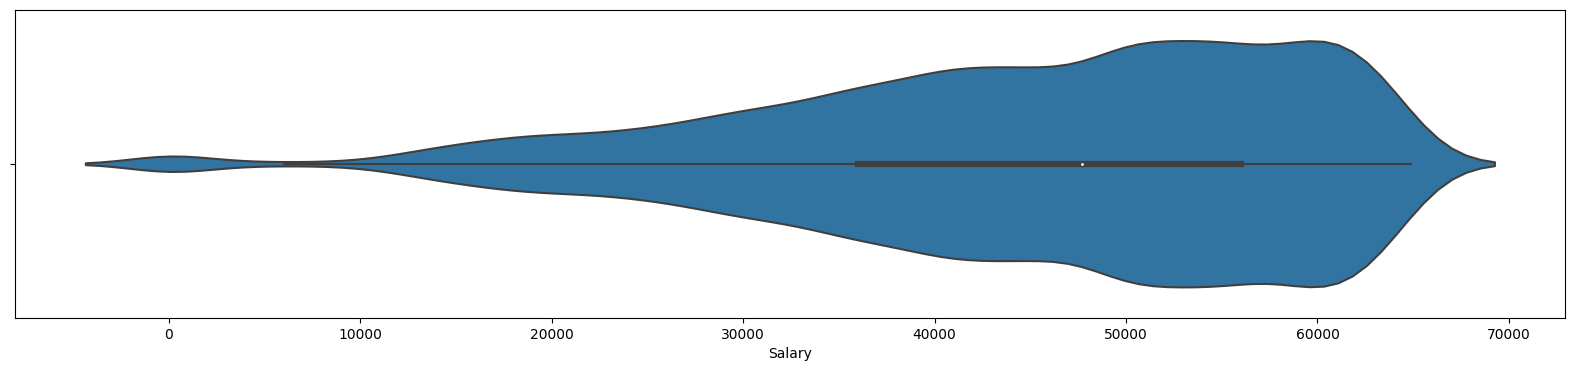

In [ ]:
plt.figure(figsize = (20,4))
sns.violinplot(x=df['Salary'].sort_values().head(10280))

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты?

In [ ]:
data = df.groupby(['Industry']).mean()['Salary'].head(10)

In [ ]:
sns.set(style = 'whitegrid')

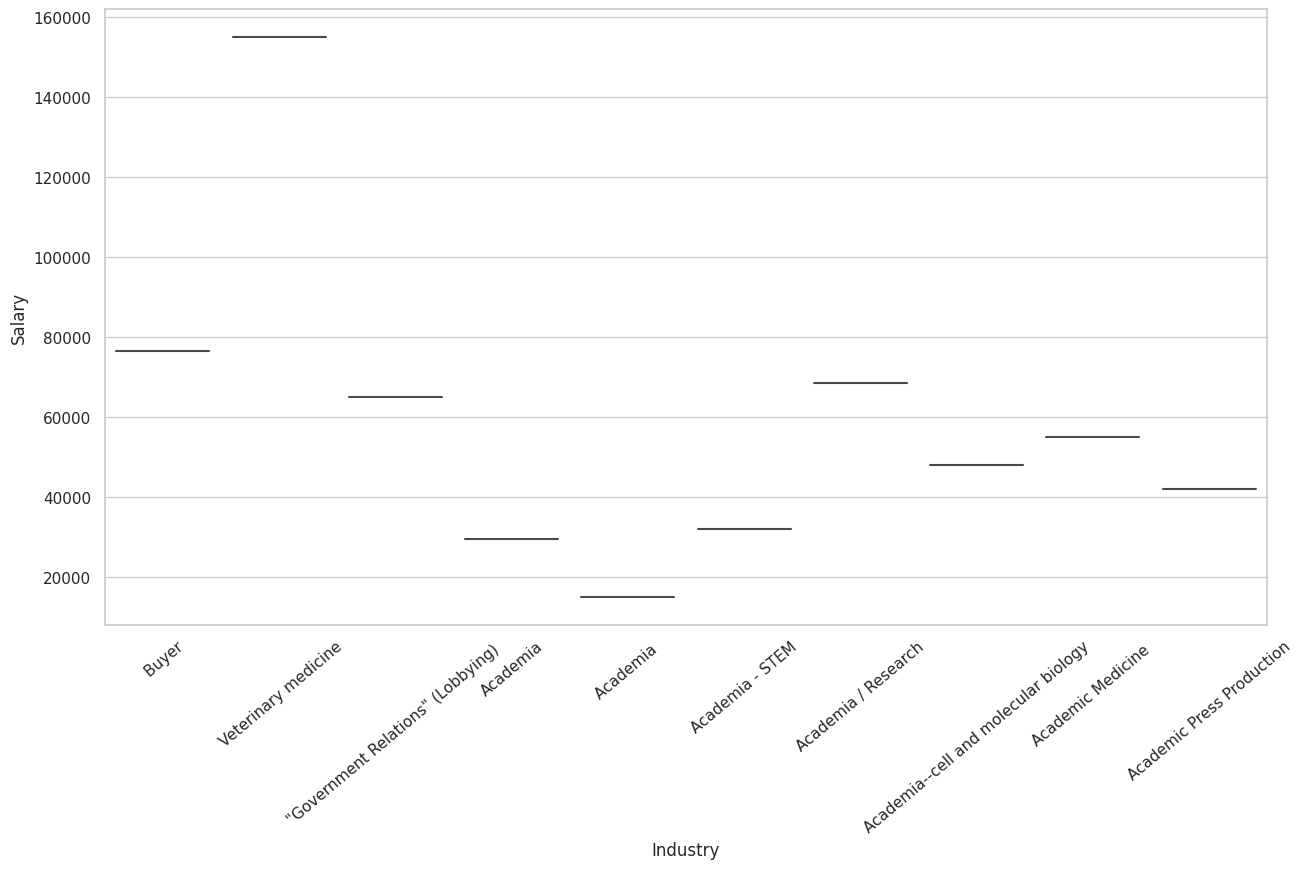

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.violinplot(x = data.index,y = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

**2)** Влияет ли опыт работы на среднюю зарплату?

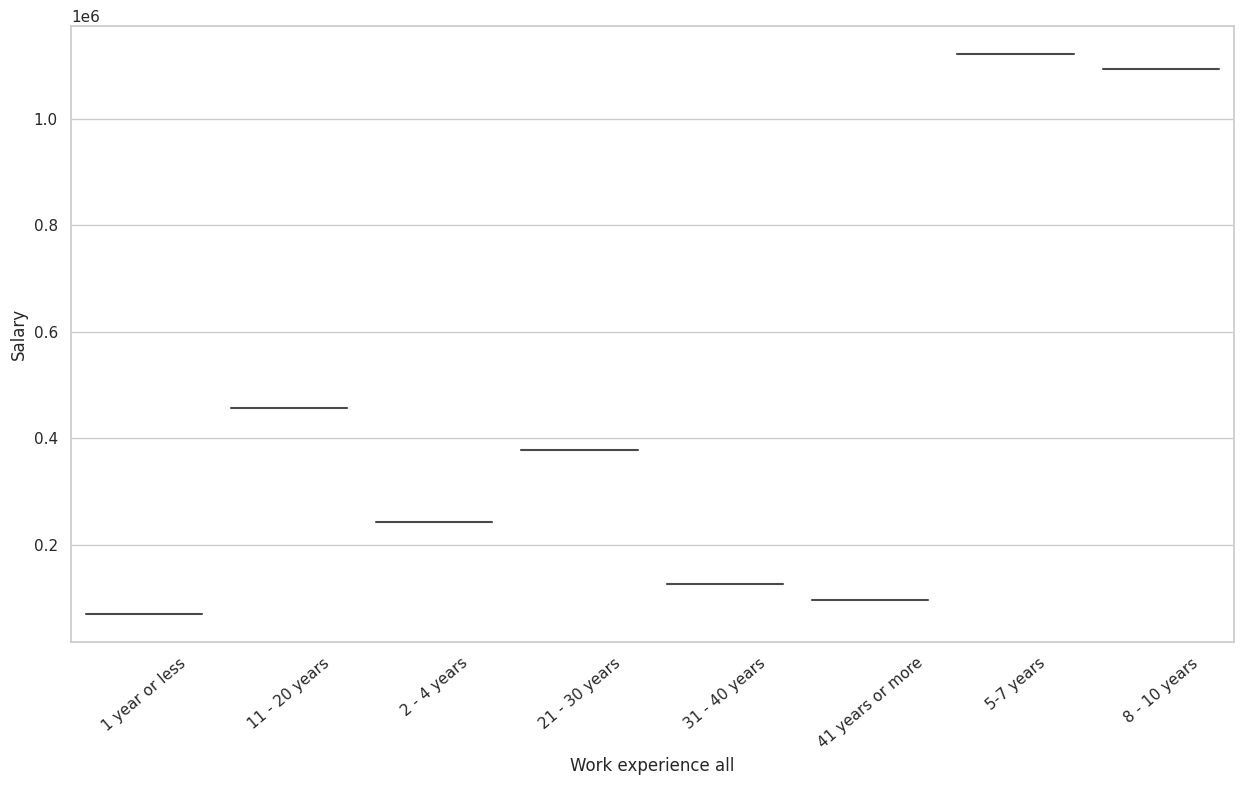

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.violinplot(x = df.groupby(['Work experience all']).mean()['Salary'].index,y = df.groupby(['Work experience all']).mean()['Salary'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

In [ ]:
amount = df[df['Amount of monetary compensation'] > 0.0 ]['Amount of monetary compensation'].sort_values().head(4300)
amount

16248       1.0
8757        2.0
27137       5.0
27642       5.0
904         6.0
          ...  
4171     4000.0
1996     4000.0
4174     4000.0
3572     4000.0
4177     4000.0
Name: Amount of monetary compensation, Length: 4300, dtype: float64

<ipython-input-16-d71ef59d8d9f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)


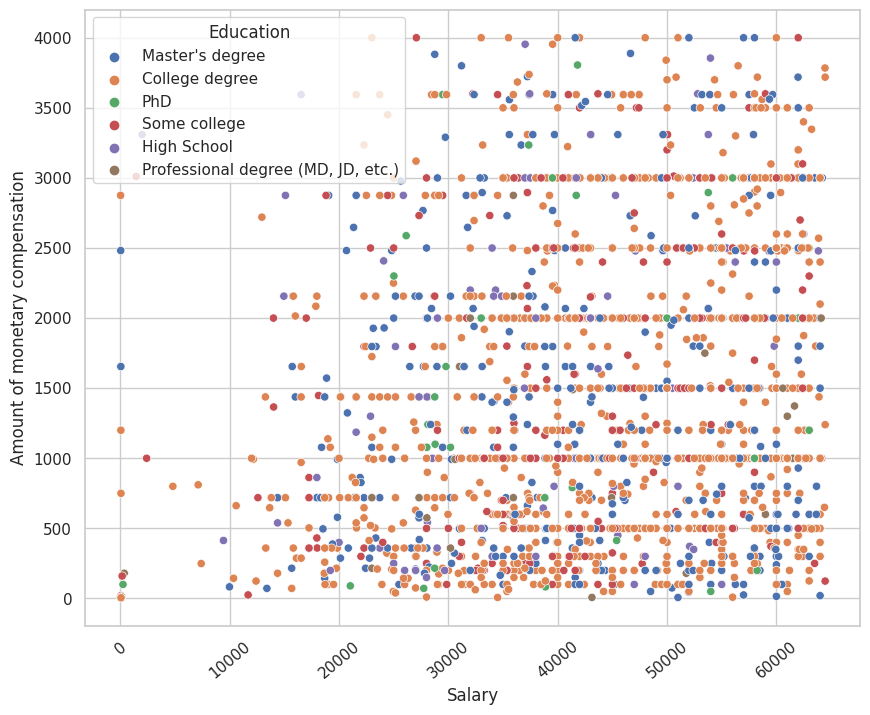

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x=df['Salary'].sort_values().head(10200), y=amount, hue = df['Education'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
plt.show()

# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму. 

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv. 
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [ ]:
city_df = pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv')

In [ ]:
city_df = city_df[['city','population']]

In [ ]:
population = []
for i in range(len(df)):
  try:
    population.append(city_df.loc[city_df['city']==df.loc[i,'City'],'population'].iloc[0])
  except: 
    population.append(np.nan)
    continue

In [ ]:
df['Population'] = population

In [ ]:
df.head(5)

,Unnamed: 0,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency,Population
0,0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,4688346.0
1,1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD,129920.0
2,2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,415501.0
3,3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,1365787.0
4,4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,484465.0


In [ ]:
from itertools import product

In [ ]:
set_age = set(df['Age'])
set_work_exp = set(df['Work expirince in current field'])

In [ ]:
combinations = list(product(set_age,set_work_exp))
print("Количество различных комбинаций:",len(combinations))

Количество различных комбинаций: 56


In [ ]:
combinations

[('45-54', '8 - 10 years'),
 ('45-54', '1 year or less'),
 ('45-54', '5-7 years'),
 ('45-54', '31 - 40 years'),
 ('45-54', '41 years or more'),
 ('45-54', '2 - 4 years'),
 ('45-54', '11 - 20 years'),
 ('45-54', '21 - 30 years'),
 ('25-34', '8 - 10 years'),
 ('25-34', '1 year or less'),
 ('25-34', '5-7 years'),
 ('25-34', '31 - 40 years'),
 ('25-34', '41 years or more'),
 ('25-34', '2 - 4 years'),
 ('25-34', '11 - 20 years'),
 ('25-34', '21 - 30 years'),
 ('18-24', '8 - 10 years'),
 ('18-24', '1 year or less'),
 ('18-24', '5-7 years'),
 ('18-24', '31 - 40 years'),
 ('18-24', '41 years or more'),
 ('18-24', '2 - 4 years'),
 ('18-24', '11 - 20 years'),
 ('18-24', '21 - 30 years'),
 ('55-64', '8 - 10 years'),
 ('55-64', '1 year or less'),
 ('55-64', '5-7 years'),
 ('55-64', '31 - 40 years'),
 ('55-64', '41 years or more'),
 ('55-64', '2 - 4 years'),
 ('55-64', '11 - 20 years'),
 ('55-64', '21 - 30 years'),
 ('65 or over', '8 - 10 years'),
 ('65 or over', '1 year or less'),
 ('65 or over', 

In [ ]:
mean_salary = {}

In [ ]:
for cmb in combinations:
  mean_salary[cmb] = df.loc[(df['Age']==cmb[0]) & (df['Work expirince in current field']==cmb[1])]['Salary'].mean()

In [ ]:
lst_mean_salary = []
for i in range(len(df)):
  lst_mean_salary.append(mean_salary[df.loc[i]['Age'],df.loc[i]['Work expirince in current field']])

In [ ]:
df['Mean salary'] = lst_mean_salary

In [ ]:
df

,Unnamed: 0,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work experience all,Work expirince in current field,Education,Gender,Race,Currency,Population,Mean salary
0,0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.000000,0.000000,NaN,USA,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,4688346.0,8.082862e+05
1,1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,39249.396095,2875.413633,NaN,UK,Another Country,Cambridge,8 - 10 years,5-7 years,College degree,NaN,White,USD,129920.0,8.082862e+05
2,2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.000000,0.000000,NaN,USA,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,415501.0,1.011698e+06
3,3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.000000,3000.000000,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,1365787.0,8.082862e+05
4,4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.000000,7000.000000,NaN,USA,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,484465.0,8.082862e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,27940,2/23/2023 15:45:08,25-34,"Accounting, Banking & Finance",Associate Business Development,NaN,77447.706403,12396.591661,NaN,Canada,Another Country,Toronto,8 - 10 years,2 - 4 years,College degree,Woman,White,USD,5429524.0,1.011698e+06
27941,27941,2/27/2023 6:22:35,25-34,Computing or Tech,Sr software engineer,NaN,190000.000000,14000.000000,NaN,USA,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American,USD,5743938.0,8.082862e+05
27942,27942,3/1/2023 9:43:37,45-54,Property or Construction,Property Manager,Senior,55000.000000,13000.000000,NaN,USA,Ohio,Brunswick,21 - 30 years,11 - 20 years,College degree,NaN,NaN,USD,53914.0,1.164255e+05
27943,27943,3/6/2023 18:16:19,25-34,Behavioral Health,Mental Health Therapist,NaN,52416.000000,0.000000,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White,USD,NaN,1.011698e+06


На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы

In [9]:
!git remote add origin git@github.com:yarkalm/salary_analysis.git

fatal: remote origin already exists.


In [7]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/yarkalm/salary_analysis.git'


In [8]:
!echo "# salary_analysis" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin git@github.com:yarkalm/salary_analysis.git
!git push -u origin main

Reinitialized existing Git repository in /content/.git/

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@a4cbddf3a607.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
fatal: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/yarkalm/salary_analysis.git'
